In [121]:
using RDatasets
using Statistics
using Distributions
using Gadfly

In [122]:
function E_step(x, mu, p, sigma)
    n = length(x)
    posterior = zeros(n, 3) # [n, 3] storing posterior probabilities
    for i in 1:n # Loop though x_i
        denom = 0.0
        for k in 1:3
            posterior[i, k] = p[k] * pdf(Normal(mu[k], sigma), x[i])
            denom += posterior[i, k]
        end
        posterior[i, :] /= denom
    end
    return posterior
end

function M_step(x, posterior)
    mu = zeros(3)
    for k in 1:3
        mu[k] = sum(posterior[:, k] .* x) / sum(posterior[:, k])
    end
    return mu
end

function EM_algorithm(x, mu, p, sigma, max_iter=100)
    for i in 1:max_iter
        posterior = E_step(x, mu, p, sigma)
        mu_new = M_step(x, posterior)
        println("Iteration $i: mu = ", mu_new)
        if maximum(abs.(mu_new .- mu))  < 1e-3
            println("Converged after $i iterations.")
            break;
        end
        mu = mu_new
    end
    return mu
end

EM_algorithm (generic function with 2 methods)

In [123]:
data = dataset("datasets", "iris");
x     = collect(Float64.(data[:, :PetalLength]))
mu = [1.0, 3.0, 5.0]
p = [0.34, 0.33, 0.33]
var = 0.54
sigma = sqrt(var)
mu = EM_algorithm(x, mu, p, sigma)

Iteration 1: mu = [1.4500358473915975, 3.25832560506759, 5.113486505536114]
Iteration 2: mu = [1.4682892153495493, 3.7788683415309796, 5.175490757322587]
Iteration 3: mu = [1.4745575475356718, 4.216200311330837, 5.266919786956328]
Iteration 4: mu = [1.4838168956794293, 4.418083041423341, 5.318048431203842]
Iteration 5: mu = [1.4919008722160474, 4.498447923744198, 5.322857568642628]
Iteration 6: mu = [1.4962762301544454, 4.532630206463933, 5.313046310092756]
Iteration 7: mu = [1.498297282185735, 4.549705049016712, 5.302410916234394]
Iteration 8: mu = [1.49927260250664, 4.559640824272774, 5.294130713201909]
Iteration 9: mu = [1.4998077265904557, 4.566009728196522, 5.288205335324761]
Iteration 10: mu = [1.5001373632364432, 4.5703018780599365, 5.28405300918009]
Iteration 11: mu = [1.500355179524179, 4.573266815906398, 5.281147325738298]
Iteration 12: mu = [1.5005043413264951, 4.575341440991798, 5.279106208643944]
Iteration 13: mu = [1.5006083123288765, 4.576803808599735, 5.277666063730882]

3-element Vector{Float64}:
 1.5006814642372492
 4.577839349786097
 5.276646164644642

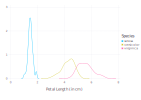

In [124]:
myplot = plot(
    data, 
    x=:PetalLength, color=:Species, Geom.density,
    Guide.xlabel("Petal Length (in cm)"),
    Theme(background_color="white")
)

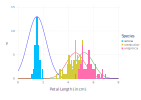

In [125]:
x_range = 0:0.02:8
myplot = plot(
    layer(data, x=:PetalLength, color=:Species, Geom.histogram, Theme(default_color=colorant"purple")),
    # layer(data, x=:PetalLength, color=:Species, Geom.density, Theme(default_color=colorant"black")),
    layer(x=x_range, y=pdf.(Normal(mu[1], sigma), x_range)*24, Geom.line, Theme(default_color=colorant"blue")),
    layer(x=x_range, y=pdf.(Normal(mu[2], sigma), x_range)*10, Geom.line, Theme(default_color=colorant"red")),
    layer(x=x_range, y=pdf.(Normal(mu[3], sigma), x_range)*10, Geom.line, Theme(default_color=colorant"green")),
    Guide.xlabel("Petal Length (in cm)"),
    Theme(background_color="white")
)